# IMPORT LIBRARIES

In [3]:
# all lib for load, plot and save csv file
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# all lib for train and test split
from sklearn.model_selection import train_test_split    # for split the data
from sklearn.model_selection import KFold               # for K-Fold cross-validation

# all lib for K-NN (classification and regression)
from sklearn.neighbors import KNeighborsClassifier      # for K-NN
from sklearn.neighbors import KNeighborsRegressor       # for K-NN


# all lib for decision tree (classification and regression)
from sklearn.tree import DecisionTreeClassifier         # for Decision Tree
from sklearn.tree import DecisionTreeRegressor          # for Decision Tree

# all lib for evaluation
from sklearn.svm import SVC                             # import Support Vector Machine to draw the decision boundary
from sklearn.metrics import confusion_matrix            # for confusion matrix
from sklearn.metrics import accuracy_score              # for accuracy score

# LOAD DATA

In [4]:
# function to load csv file
def load_csv(file):
    data = pd.read_csv(file)
    return data


In [5]:
# load ./w3classif.csv
path = os.getcwd()
classify = path + '/assignTTSWING.csv'
# because the data don't have header, we need to make the header as row 1 and add the header
classifyData = pd.read_csv(classify)
print(classifyData)

       id        date  testmode  teststage  fileindex  count      ax_mean  \
0      10  16/09/2019         0          0          1      1   925.058824   
1      10  16/09/2019         0          0          1      2  -420.058824   
2      10  16/09/2019         0          0          1      3 -5324.764706   
3      10  16/09/2019         0          0          1      4 -6434.882353   
4      10  16/09/2019         0          0          1      5 -7145.823529   
...    ..         ...       ...        ...        ...    ...          ...   
97350  63  21/01/2021         2          0          6     46 -8953.500000   
97351  63  21/01/2021         2          0          6     47 -2513.954545   
97352  63  21/01/2021         2          0          6     48 -3063.500000   
97353  63  21/01/2021         2          0          6     49 -1038.727273   
97354  63  21/01/2021         2          0          6     50  -506.409091   

           ay_mean      az_mean      gx_mean  ...   age  playYears  height 

In [6]:
# verify the data
print(classifyData.columns) # print the column names

'''
'id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean',
       'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var',
       'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms',
       'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 'a_max', 'a_mean', 'a_min',
       'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
       'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy',
       'gender', 'age', 'playYears', 'height', 'weight', 'handedness',
       'holdRacketHanded', 'newv1', 'newv2', 'newv3', 'newv4'
'''
# describe the data: excluding id, date/ show how many different testmode, teststage, fileindex / show max, mean, min of non categorical data
# write the data to a excel file
classifyData.describe(include='all').to_excel('classifyData.xlsx', index=False)

Index(['id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean',
       'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var',
       'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms',
       'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 'a_max', 'a_mean', 'a_min',
       'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
       'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy',
       'gender', 'age', 'playYears', 'height', 'weight', 'handedness',
       'holdRacketHanded', 'newv1', 'newv2', 'newv3', 'newv4'],
      dtype='object')


In [7]:
# convert string to category for categorical data ( without date)
# for col in classifyData.columns:
#     # if the column is date, convert to datetime
#     if classifyData[col].dtype == 'object':
#         classifyData[col] = classifyData[col].astype('category').cat.codes
#     else:
#         print(f'{col} is not a categorical data')

# # check the data type of each column
# print(classifyData.dtypes)

# convert date to datetime example input:16/09/2019 or 5/10/2019 day/month/year separated by /
classifyData['date'] = pd.to_datetime(classifyData['date'], format='%d/%m/%Y', errors='coerce')
# check the data type date
print("data type of date: ", classifyData['date'].dtype)

# print range of date
print("date range: ", classifyData['date'].min(), " to ", classifyData['date'].max())


data type of date:  datetime64[ns]
date range:  2019-09-16 00:00:00  to  2021-01-21 00:00:00


# DATA CLEANING

In [ ]:
cleanedData = classifyData.copy() # make a copy of the cleaned dat

# check for faulty data (??? values)
while cleanedData.isin(['???']).any().any():
    print("Faulty data found in the data")
    # print the faulty data
    print(cleanedData[cleanedData.isin(['???']).any(axis=1)]) # axis=1 means check row by row
    # print faulty data to excel file
    cleanedData[cleanedData.isin(['???']).any(axis=1)].to_excel('faultyData.xlsx', index=False)
    cleanedData = cleanedData.replace('???', np.nan) # replace the faulty data with NaN
    print("Faulty data removed")

# check for missing values (NaN)
while cleanedData.isnull().values.any():
    print("Missing values found in the data")
    # print the missing values
    print(cleanedData[cleanedData.isnull().any(axis=1)]) # axis=1 means check row by row
    # print missing values to excel file
    cleanedData[cleanedData.isnull().any(axis=1)].to_excel('missingValues.xlsx', index=False)
    cleanedData = cleanedData.dropna() # drop the rows with missing values
    print("Missing values removed")    
    
# check for duplicate values
while cleanedData.duplicated().any():
    print("Duplicate values found in the data")
    
    # print duplicate values to excel file
    cleanedData[cleanedData.duplicated()].to_excel('duplicateValues.xlsx', index=False)    
    print(cleanedData[cleanedData.duplicated()])

    cleanedData = cleanedData.drop_duplicates() # drop the duplicate values
    print("Duplicate values removed")
    

    if cleanedData.duplicated().any():
        print("Some duplicates still remain after removal.")



Faulty data found in the data
       id date  testmode  teststage  fileindex  count  ax_mean  ay_mean  \
9999    0  NaT         0          0          0      0      0.0      0.0   
19999   0  NaT         0          0          0      0      0.0      0.0   
29999   0  NaT         0          0          0      0      0.0      0.0   
39999   0  NaT         0          0          0      0      0.0      0.0   
49999   0  NaT         0          0          0      0      0.0      0.0   

       az_mean  gx_mean  ...  age  playYears  height  weight  handedness  \
9999       0.0      0.0  ...  ???        ???     ???     ???           0   
19999      0.0      0.0  ...  ???        ???     ???     ???           0   
29999      0.0      0.0  ...  ???        ???     ???     ???           0   
39999      0.0      0.0  ...  ???        ???     ???     ???           0   
49999      0.0      0.0  ...  ???        ???     ???     ???           0   

       holdRacketHanded  newv1  newv2  newv3  newv4  
9999    

# PERFORM EDA (Exploratory Data Analysis)

In [ ]:
'''
Index(['id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean',
       'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var',
       'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms',
       'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 'a_max', 'a_mean', 'a_min',
       'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
       'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy',
       'gender', 'age', 'playYears', 'height', 'weight', 'handedness',
       'holdRacketHanded', 'newv1', 'newv2', 'newv3', 'newv4'],
      dtype='object')
                 id      testmode     teststage     fileindex        count  \
count  97355.000000  97355.000000  97355.000000  97355.000000  97355.00000   
mean      43.843665      1.087258      1.238765      3.539623     25.49869   
std       27.208801      0.483554      0.953469      2.930125     14.43173   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%       20.000000      1.000000      1.000000      1.000000     13.00000   
50%       46.000000      1.000000      1.000000      3.000000     25.00000   
75%       66.000000      1.000000      2.000000      5.000000     38.00000   
max       92.000000      2.000000      3.000000     26.000000     50.00000   

            ax_mean       ay_mean       az_mean       gx_mean       gy_mean  \
count  97355.000000  97355.000000  97355.000000  97355.000000  97355.000000   
mean   -2921.404897   -218.352881  -1640.993621    817.979526    -77.558540   
std     2845.664593   3992.006605   1479.344409   1438.056696   1495.197333   
min   -25557.500000 -16872.000000 -10112.400000 -16558.250000 -17013.000000   
25%    -3738.082608  -3225.757757  -2787.445906    226.766304  -1069.691464   
50%    -2709.500000   -465.894737  -1922.388889   1027.775510    239.688889   
75%    -1716.295918   2777.439946   -641.591848   1620.680373    831.333522   
max    15096.470590  25487.333330  11210.000000  15170.333330  18125.333330   

       ...       g_skewn     a_entropy     g_entropy        gender  \
count  ...  97355.000000  97355.000000  97355.000000  97355.000000   
mean   ...     38.903424     -3.020282     -3.017610      0.603975   
std    ...     31.933707      0.582751      0.582385      0.489072   
min    ...    -69.167519     -5.064161     -5.078669      0.000000   
25%    ...     13.126988     -3.568395     -3.566340      0.000000   
50%    ...     38.271206     -2.938864     -2.931517      1.000000   
75%    ...     61.678661     -2.836737     -2.838172      1.000000   
max    ...    478.611435      0.000000      0.000000      1.000000   

         handedness  holdRacketHanded         newv1         newv2  \
count  97355.000000      97355.000000  97355.000000  97355.000000   
mean       0.834574          0.834574  -2922.797810   -209.864418   
std        0.371566          0.371566   2845.599252  20005.067679   
min        0.000000          0.000000 -16335.369190 -94104.184950   
25%        1.000000          1.000000  -4844.246042 -13692.341815   
50%        1.000000          1.000000  -2919.055189   -144.614468   
75%        1.000000          1.000000   -991.330255  13191.052745   
max        1.000000          1.000000  10906.689750  88867.512180   

              newv3         newv4  
count  97355.000000  97355.000000  
mean   -1641.293755     32.058723  
std      148.319219     18.194006  
min    -2332.549823      0.000000  
25%    -1740.657448     16.000000  
50%    -1641.301354     32.000000  
75%    -1542.219637     48.000000  
max        0.000000     63.000000 
'''

In [ ]:
# 1) Taller players may generate different accelerometer/gyroscope patterns due to longer limb reach and arc. 
# -> height classification (3 classes: short (<170cm), medium (170-180cm), tall (>180cm))
# 2) Body mass may influence swing strength and movement speed.
# -> weight classification (3 classes: light (<60kg), medium (60-80kg), heavy (>80kg))
# 3) Age may affect swing speed and strength.
# -> age classification (3 classes: young (<20), middle-aged (20-40), old (>40))
# 4) different kurtosis and skewness (e.g., a_kurt, g_kurt, a_skewn, g_skewn) may indicate different swing patterns and identify strange or faulty swings.
# -> kurtosis classification (3 classes: low (<0), medium (0-1), high (>1))

## Distribution of the target variables

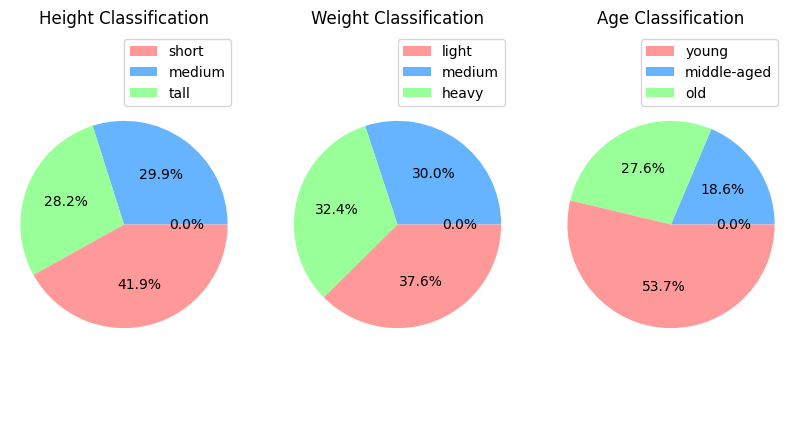

In [41]:
# use pie plot to show the if the data is balance (height, weight, age - with values 1,2,3 represents high/medium/low)
height = classifyData['height'].values
weight = classifyData['weight'].values
age = classifyData['age'].values

colors = ['#ff9999','#66b3ff','#99ff99']

# pie plot for height
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.pie(np.bincount(height), autopct='%1.1f%%', colors=colors)
plt.title('Height Classification')
plt.axis('equal')
plt.legend(['short', 'medium', 'tall'], loc='upper right')

# pie plot for weight
plt.subplot(1, 3, 2)
plt.pie(np.bincount(weight), autopct='%1.1f%%', colors=colors)
plt.title('Weight Classification')
plt.axis('equal')
plt.legend(['light', 'medium', 'heavy'], loc='upper right')

# pie plot for age
plt.subplot(1, 3, 3)
plt.pie(np.bincount(age), autopct='%1.1f%%', colors=colors)
plt.title('Age Classification')
plt.axis('equal')
plt.legend(['young', 'middle-aged', 'old'], loc='upper right')
plt.show()



## Correlation of the target variables with the features

BMI = weight / (height ** 2)


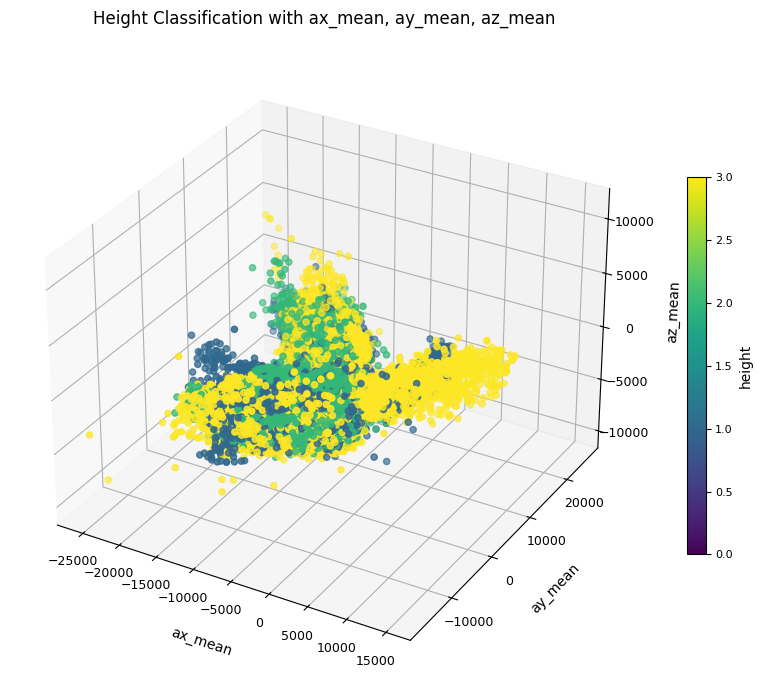

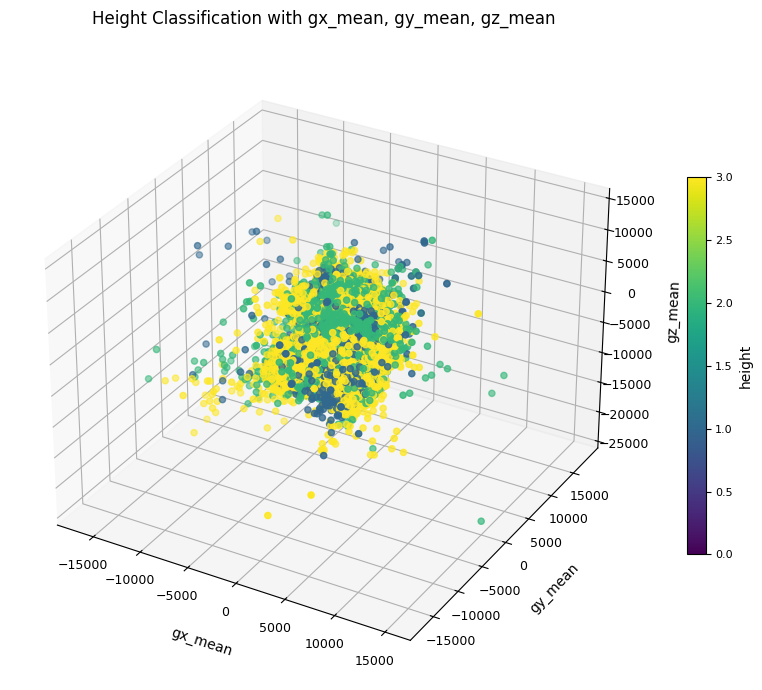

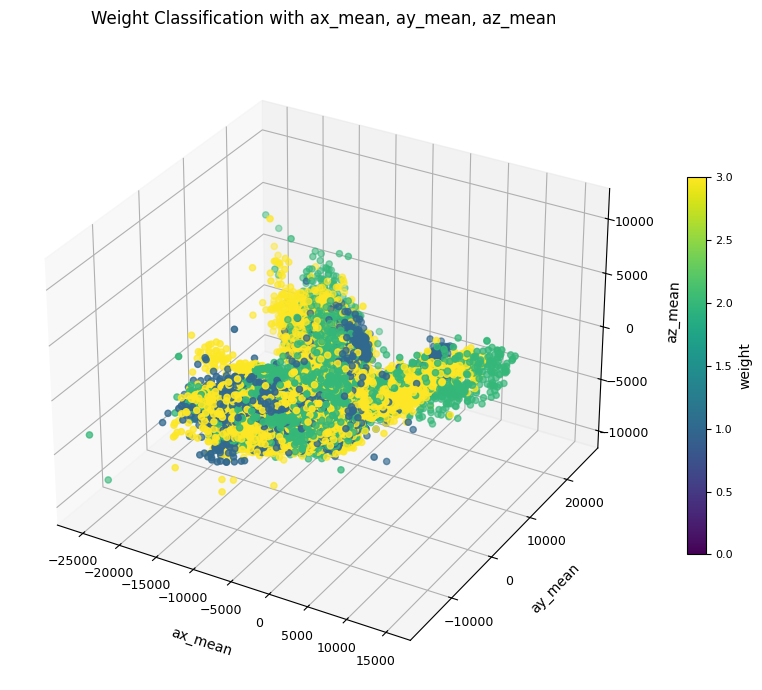

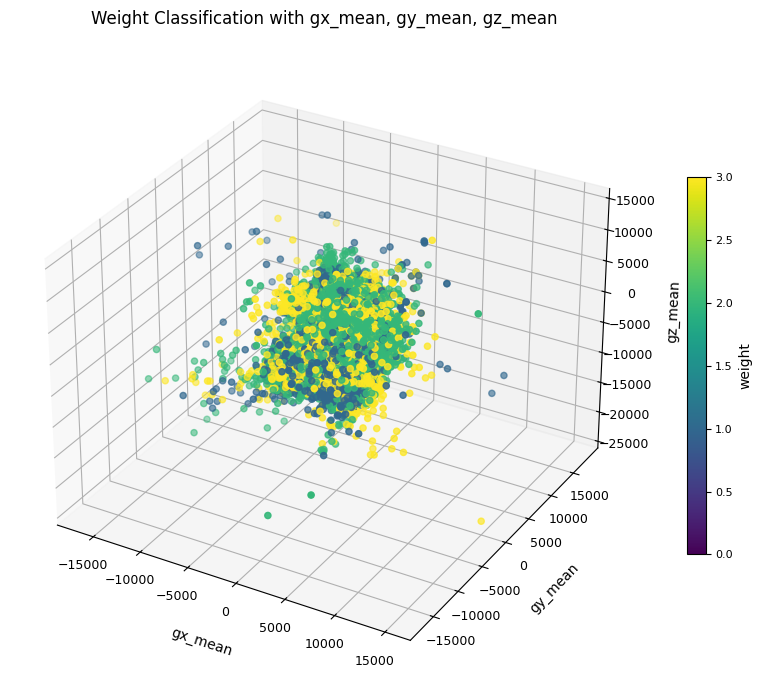

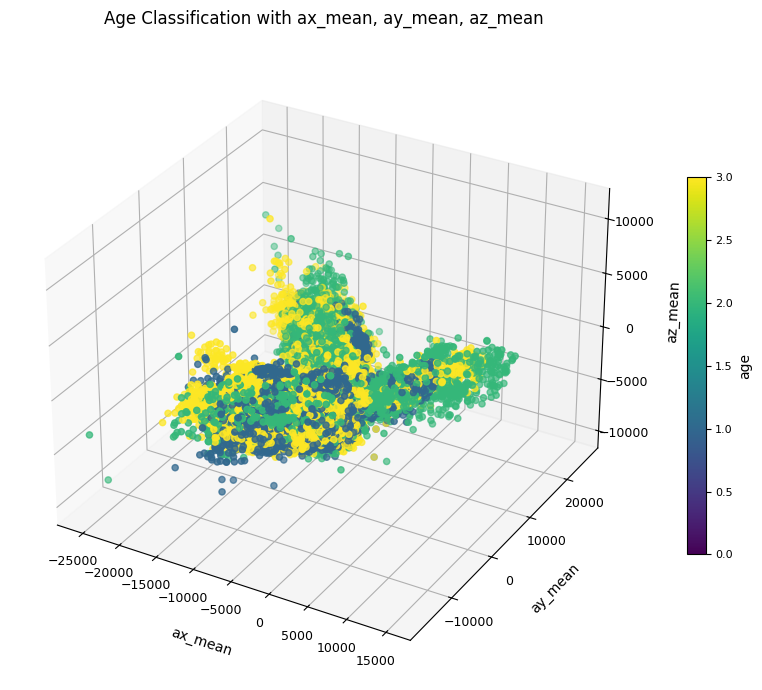

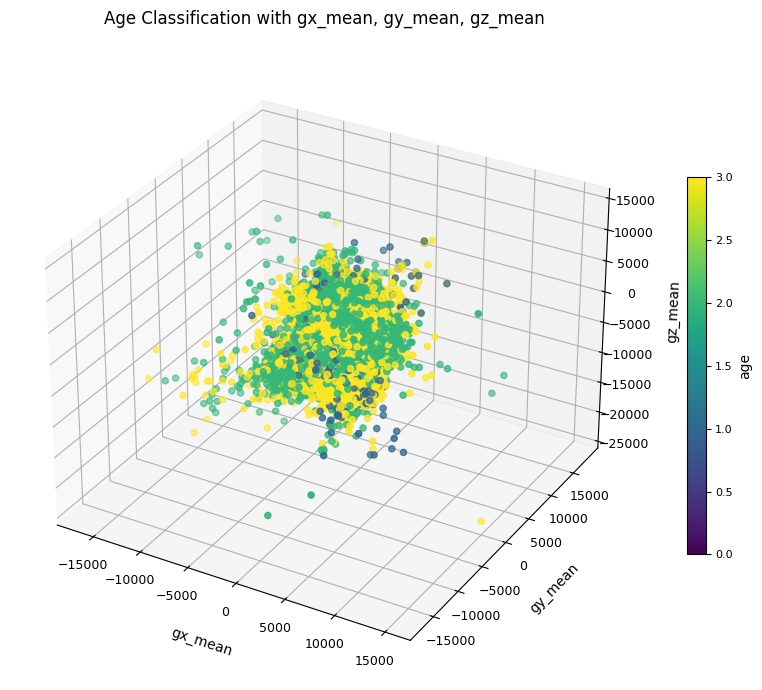

In [63]:
# make scatter plot for height with orientation make from
# accelerometer data (ax_mean, ay_mean, az_mean) and gyroscope data (gx_mean, gy_mean, gz_mean)

def plot_scatter(data, x, y, z, title, target='height'):
    fig = plt.figure(figsize=(10, 7))  # Slightly taller to reduce overlap
    ax = fig.add_subplot(111, projection='3d')

    # Plot
    scatter = ax.scatter(data[x], data[y], data[z],
                         c=data[target], cmap='viridis', marker='o')

    # Axis labels with controlled font size and padding
    ax.set_xlabel(x, fontsize=10, labelpad=10)
    ax.set_ylabel(y, fontsize=10, labelpad=10)
    ax.set_zlabel(z, fontsize=10, labelpad=10)

    # Axis ticks
    ax.tick_params(axis='both', which='major', labelsize=9)
    ax.set_title(title, fontsize=12, pad=20)

    # Optional: add colorbar for target variable
    cbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
    cbar.set_label(target, fontsize=10)
    cbar.ax.tick_params(labelsize=8)

    plt.tight_layout()
    # Save the figure with a specific DPI
    plt.savefig(f'{title}.png', dpi=300, bbox_inches='tight')
    plt.show()
    
# plot scatter plot for height with ax_mean, ay_mean, az_mean
plot_scatter(classifyData, 'ax_mean', 'ay_mean', 'az_mean', 'Height Classification with ax_mean, ay_mean, az_mean', target='height')
# plot scatter plot for height with gx_mean, gy_mean, gz_mean
plot_scatter(classifyData, 'gx_mean', 'gy_mean', 'gz_mean', 'Height Classification with gx_mean, gy_mean, gz_mean', target='height')
# plot scatter plot for weight with ax_mean, ay_mean, az_mean
plot_scatter(classifyData, 'ax_mean', 'ay_mean', 'az_mean', 'Weight Classification with ax_mean, ay_mean, az_mean', target='weight')
# plot scatter plot for weight with gx_mean, gy_mean, gz_mean
plot_scatter(classifyData, 'gx_mean', 'gy_mean', 'gz_mean', 'Weight Classification with gx_mean, gy_mean, gz_mean', target='weight')
# plot scatter plot for age with ax_mean, ay_mean, az_mean
plot_scatter(classifyData, 'ax_mean', 'ay_mean', 'az_mean', 'Age Classification with ax_mean, ay_mean, az_mean', target='age')
# plot scatter plot for age with gx_mean, gy_mean, gz_mean
plot_scatter(classifyData, 'gx_mean', 'gy_mean', 'gz_mean', 'Age Classification with gx_mean, gy_mean, gz_mean', target='age')

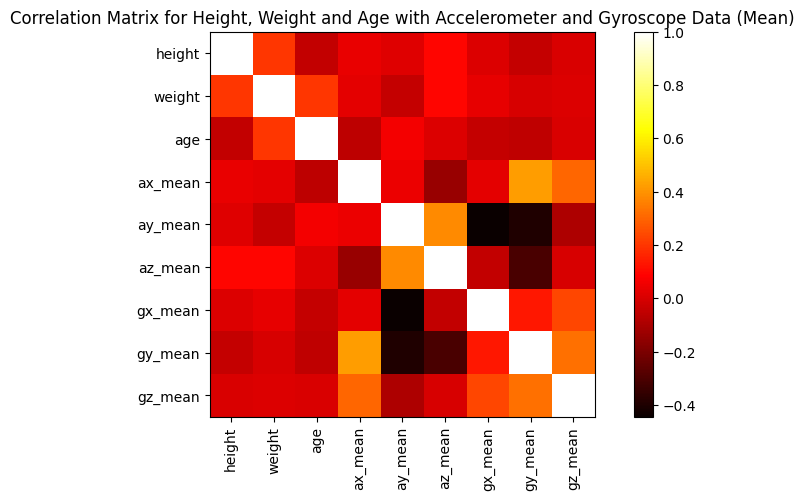

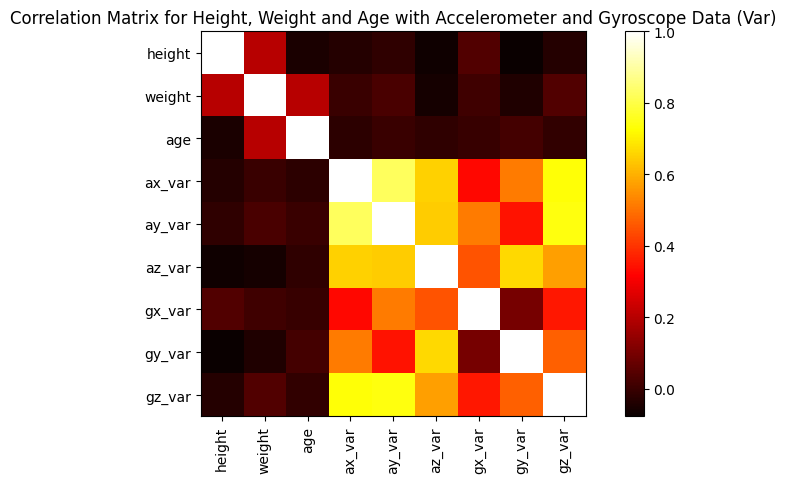

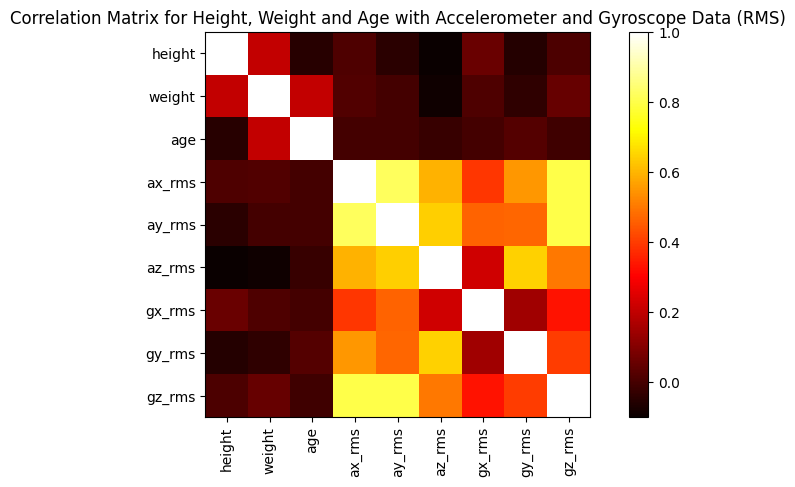

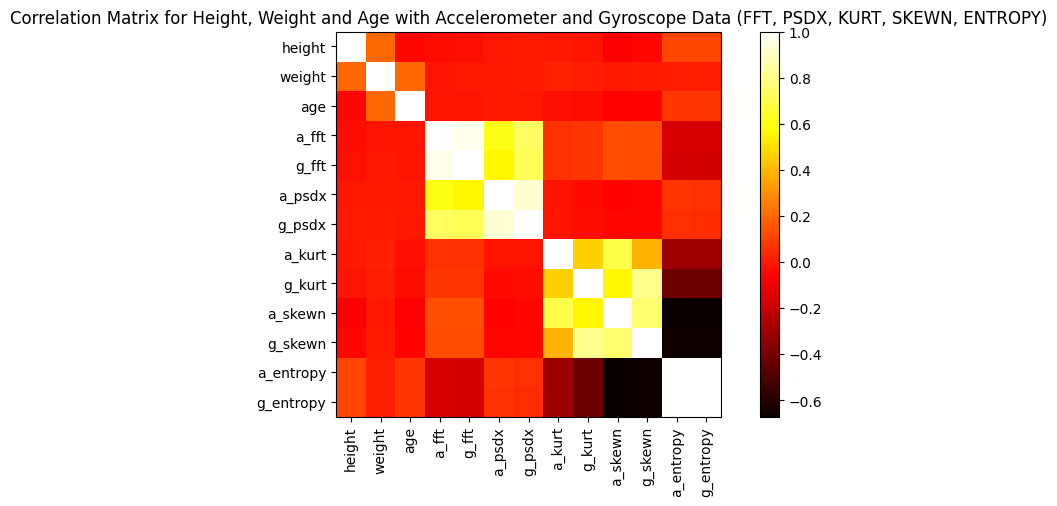

In [65]:
# make scatter plot for weight with orientation make from
# accelerometer data (ax_mean, ay_mean, az_mean) and gyroscope data (gx_mean, gy_mean, gz_mean)

# correlation matrix for height, weight and BMI with accelerometer and gyroscope data (mean)
corr = classifyData[['height', 'weight', 'age', 'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean']].corr()
# plot the correlation matrix
plt.figure(figsize=(10, 5))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix for Height, Weight and Age with Accelerometer and Gyroscope Data (Mean)', fontsize=12)
plt.show()

# plot the correlation matrix for height, weight and BMI with accelerometer and gyroscope data (var)
corr = classifyData[['height', 'weight', 'age', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var']].corr()
# plot the correlation matrix
plt.figure(figsize=(10, 5))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix for Height, Weight and Age with Accelerometer and Gyroscope Data (Var)', fontsize=12)
plt.show()

# plot the correlation matrix for height, weight and BMI with accelerometer and gyroscope data (rms)
corr = classifyData[['height', 'weight', 'age', 'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms']].corr()
# plot the correlation matrix
plt.figure(figsize=(10, 5))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix for Height, Weight and Age with Accelerometer and Gyroscope Data (RMS)', fontsize=12)
plt.show()

# plot the correlation matrix for height, weight and BMI with accelerometer and gyroscope data (fft, psdx, kurt, skewn, entropy)
corr = classifyData[['height', 'weight', 'age', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx', 'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy']].corr()
# plot the correlation matrix
plt.figure(figsize=(10, 5))
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix for Height, Weight and Age with Accelerometer and Gyroscope Data (FFT, PSDX, KURT, SKEWN, ENTROPY)', fontsize=12)
plt.show()



In [84]:
# make scatter plot for BMI with orientation make from
# accelerometer data (ax_mean, ay_mean, az_mean) and gyroscope data (gx_mean, gy_mean, gz_mean)

BMIs = classifyData['weight'] / ((classifyData['height'] / 100) ** 2)
classifyData['BMI'] = BMIs

# instead of weight and height individually, we can use BMI with represent the health of the player

In [61]:
# plot accelerometer data (ax_mean, ay_mean, az_mean) based on count and
plotdata = cleanedData.copy() # make a copy of the plotdata
plotdata = plotdata[['id','date', 'testmode', 'teststage', 'fileindex', 'count', 'handedness', 'holdRacketHanded', 'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean']] # select the columns to plot

# print distinct values of date and testmode
print("Distinct values of id: ", plotdata['id'].unique())
print("Distinct values of date: ", plotdata['date'].unique())
print("Distinct values of testmode: ", plotdata['testmode'].unique())
print("Distinct values of teststage: ", plotdata['teststage'].unique())
print("Distinct values of fileindex: ", plotdata['fileindex'].unique())
print("Distinct values of count: ", plotdata['count'].unique())
print("Distinct values of handedness: ", plotdata['handedness'].unique())
print("Distinct values of holdRacketHanded: ", plotdata['holdRacketHanded'].unique())

# testmode = 0, teststage = 0, fileindex = 0, date = 2020-02-18 00:00:00
# filter the data based on testmode, teststage, fileindex, date, handedness and holdRacketHanded
plotdata = plotdata[(plotdata['testmode'] == 0) & (plotdata['teststage'] == 0) 
                    & (plotdata['fileindex'] == 1) & (plotdata['date'] == '2020-02-18 00:00:00') 
                    & (plotdata['handedness'] == 1) & (plotdata['holdRacketHanded'] == 1)] 

plotdata = plotdata.dropna() # drop the rows with missing values
plotdata = plotdata.drop_duplicates() # drop the duplicate values
plotdata = plotdata.reset_index(drop=True) # reset the index


# # plot the data
# plt.figure(figsize=(10, 5))
# plt.plot(plotdata['count'], plotdata['ax_mean'], label='ax_mean')
# plt.plot(plotdata['count'], plotdata['ay_mean'], label='ay_mean')
# plt.plot(plotdata['count'], plotdata['az_mean'], label='az_mean')
# plt.title('Accelerometer Data (ax_mean, ay_mean, az_mean) based on Count')
# plt.xlabel('Count')
# plt.ylabel('Accelerometer Data')
# plt.legend()
# plt.show()


Distinct values of id:  [10 12 32 15 17 46 74 90 50 30 24 64 80 84 48 42  6 18  8  7 33 38 27 22
 73 75 72 66 82 43 70  0  1 11 31 35 16 67 71 78 83 47  4  5 25 86 59 60
 92 19 28 34 36 37 53 21 91 63  9 13 29 20 65 79 85 81 44 58 69 51 89 14
 26 39 88 77 55 56 57 45 23 40 54 76 49  2  3 68 52 87 61 62 41]
Distinct values of date:  <DatetimeArray>
['2019-09-16 00:00:00', '2019-09-17 00:00:00', '2019-10-06 00:00:00',
 '2019-11-02 00:00:00', '2019-11-29 00:00:00', '2020-01-17 00:00:00',
 '2020-02-05 00:00:00', '2020-02-18 00:00:00', '2020-02-19 00:00:00',
 '2020-02-20 00:00:00', '2020-02-26 00:00:00', '2020-03-04 00:00:00',
 '2020-09-11 00:00:00', '2020-09-12 00:00:00', '2020-09-14 00:00:00',
 '2020-09-15 00:00:00', '2020-09-16 00:00:00', '2020-10-24 00:00:00',
 '2021-01-21 00:00:00']
Length: 19, dtype: datetime64[ns]
Distinct values of testmode:  [0 1 2]
Distinct values of teststage:  [0 1 2 3]
Distinct values of fileindex:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 2

Number of players: 3


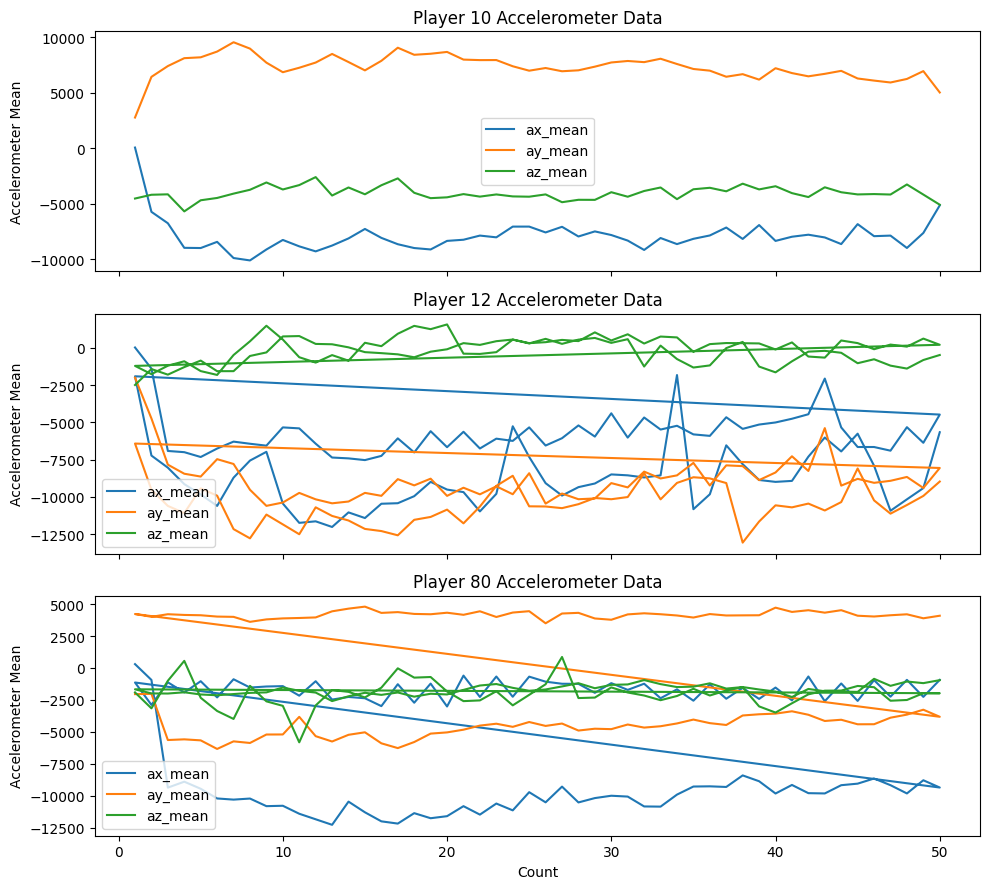

In [62]:
# Get unique player IDs
player_ids = plotdata['id'].unique()
num_players = len(player_ids)
print(f"Number of players: {num_players}")

# Dynamically adjust figure height based on number of players
fig, axes = plt.subplots(num_players, 1, figsize=(10, 3 * num_players), sharex=True)

# If only one player, axes is not a list, so wrap it
if num_players == 1:
    axes = [axes]

# Plot each player's data
for idx, player_id in enumerate(player_ids):
    ax = axes[idx]
    player_data = plotdata[plotdata['id'] == player_id]
    
    ax.plot(player_data['count'], player_data['ax_mean'], label='ax_mean')
    ax.plot(player_data['count'], player_data['ay_mean'], label='ay_mean')
    ax.plot(player_data['count'], player_data['az_mean'], label='az_mean')
    
    ax.set_title(f'Player {player_id} Accelerometer Data')
    ax.set_ylabel('Accelerometer Mean')
    ax.legend()

# Label the common x-axis at the bottom
axes[-1].set_xlabel('Count')

plt.tight_layout()
plt.show()


Number of players with data after filtering: 3
Players with data after filtering: [10 12 80]
Number of data points for Player 10 after filtering: 50
Number of data points for Player 12 after filtering: 100
Number of data points for Player 80 after filtering: 100


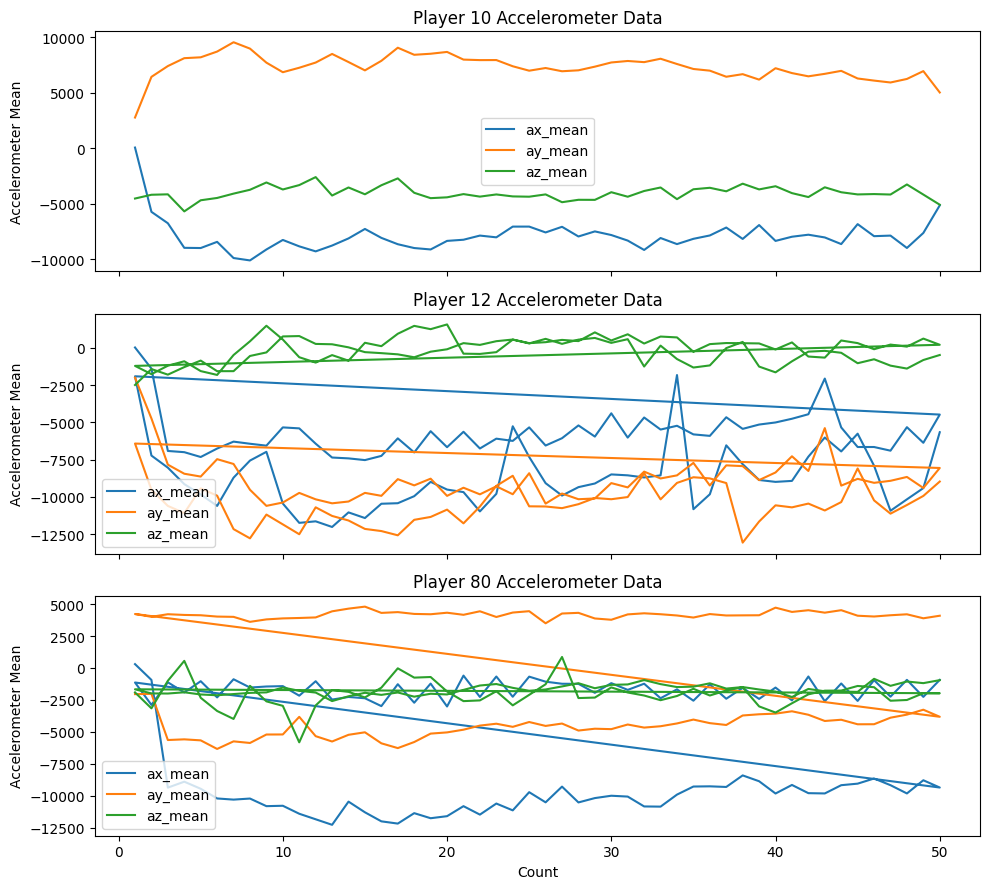

In [66]:
# Assuming 'classifyData' is your DataFrame
plotdata = cleanedData.copy()
plotdata = plotdata[['id','date', 'testmode', 'teststage', 'fileindex', 'count', 'handedness', 'holdRacketHanded', 'ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean']]

# Filter the data
filtered_plotdata = plotdata[(plotdata['testmode'] == 0) & (plotdata['teststage'] == 0)
                                & (plotdata['fileindex'] == 1) & (plotdata['date'] == '2020-02-18 00:00:00')
                                & (plotdata['handedness'] == 1) & (plotdata['holdRacketHanded'] == 1)]

filtered_plotdata = filtered_plotdata.dropna()
filtered_plotdata = filtered_plotdata.drop_duplicates()
filtered_plotdata = filtered_plotdata.reset_index(drop=True)

# Get unique player IDs from the filtered data
player_ids_filtered = filtered_plotdata['id'].unique()
print(f"Number of players with data after filtering: {len(player_ids_filtered)}")
print("Players with data after filtering:", player_ids_filtered)

# Check the number of rows for Player 10, 12 and 80 in the filtered data

player_10_data_count = len(filtered_plotdata[filtered_plotdata['id'] == 10])
player_12_data_count = len(filtered_plotdata[filtered_plotdata['id'] == 12])
player_80_data_count = len(filtered_plotdata[filtered_plotdata['id'] == 80])

print(f"Number of data points for Player 10 after filtering: {player_10_data_count}")
print(f"Number of data points for Player 12 after filtering: {player_12_data_count}")
print(f"Number of data points for Player 80 after filtering: {player_80_data_count}")

# --- The rest of your plotting code remains the same ---
num_players = len(player_ids_filtered)
fig, axes = plt.subplots(num_players, 1, figsize=(10, 3 * num_players), sharex=True)

if num_players == 1:
    axes = [axes]

for idx, player_id in enumerate(player_ids_filtered):
    ax = axes[idx]
    player_data = filtered_plotdata[filtered_plotdata['id'] == player_id]

    ax.plot(player_data['count'], player_data['ax_mean'], label='ax_mean')
    ax.plot(player_data['count'], player_data['ay_mean'], label='ay_mean')
    ax.plot(player_data['count'], player_data['az_mean'], label='az_mean')

    ax.set_title(f'Player {player_id} Accelerometer Data')
    ax.set_ylabel('Accelerometer Mean')
    ax.legend()

axes[-1].set_xlabel('Count')

plt.tight_layout()
plt.show()

     id       date  testmode  teststage  fileindex  count       ax_mean  \
50   12 2020-02-18         0          0          1      1     27.187500   
51   12 2020-02-18         0          0          1      2  -1391.250000   
52   12 2020-02-18         0          0          1      3  -6917.562500   
53   12 2020-02-18         0          0          1      4  -6999.750000   
54   12 2020-02-18         0          0          1      5  -7323.437500   
..   ..        ...       ...        ...        ...    ...           ...   
145  12 2020-02-18         0          0          1     46  -7908.642857   
146  12 2020-02-18         0          0          1     47 -10930.500000   
147  12 2020-02-18         0          0          1     48 -10165.285710   
148  12 2020-02-18         0          0          1     49  -9411.000000   
149  12 2020-02-18         0          0          1     50  -5659.500000   

          ay_mean      az_mean  
50   -2000.687500 -2491.500000  
51   -4737.875000 -1420.125000  


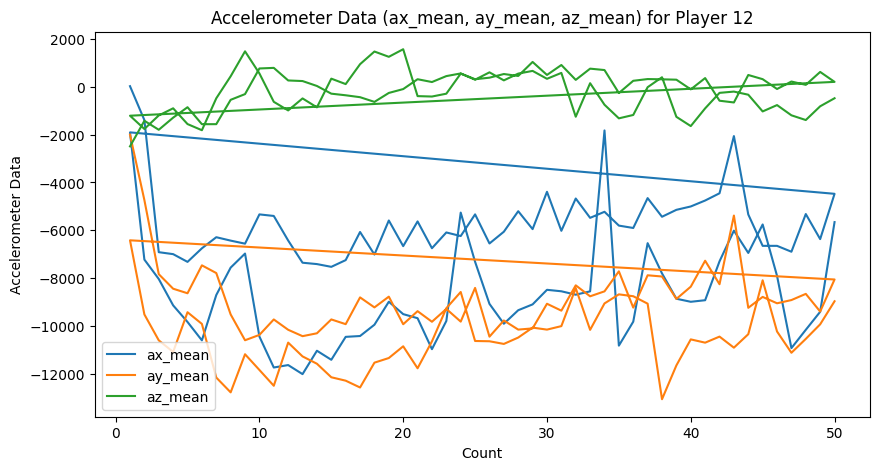

In [54]:
# plot data for player with id = 12
plotdata = plotdata[plotdata['id'] == 12]

#prnt the data for player with id = 12
print(plotdata[['id', 'date', 'testmode', 'teststage', 'fileindex', 'count', 'ax_mean', 'ay_mean', 'az_mean']])

# plot the data
plt.figure(figsize=(10, 5))
plt.plot(plotdata['count'], plotdata['ax_mean'], label='ax_mean')
plt.plot(plotdata['count'], plotdata['ay_mean'], label='ay_mean')
plt.plot(plotdata['count'], plotdata['az_mean'], label='az_mean')
plt.title('Accelerometer Data (ax_mean, ay_mean, az_mean) for Player 12')
plt.xlabel('Count')
plt.ylabel('Accelerometer Data')
plt.legend()
plt.show()

# SPLITS DATA INTO TRAINING AND TESTING SETS

In [ ]:
# Randomly shuffle the datasets (i.e. the order of the rows) and split them each into
# 70% (for training) and 30% (for testing).

# simple split for train and test
train, test = train_test_split(classifyData, test_size=0.3, random_state=42)
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

# fold the data into 5 folds for cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5 folds with shuffle
    


Train shape: (68148, 52)
Test shape: (29207, 52)
Train shape: (77884, 52)
Test shape: (19471, 52)
Train shape: (77884, 52)
Test shape: (19471, 52)
Train shape: (77884, 52)
Test shape: (19471, 52)
Train shape: (77884, 52)
Test shape: (19471, 52)
Train shape: (77884, 52)
Test shape: (19471, 52)


# TRAIN MODEL

## I. KNN classifier model
1) height with all features (18 means, var, rms + 10 max, min, skewness, kurtosis + 6 fft, psdx, entropy)
2) weight with all features
3) BMI with all features 
4) evaluations

In [80]:
# 1) K-NN for height classification (all features)
def knn_target(train, test, k=3, target='height'):
    # K-NN for target (height, weight, age) classification
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train[['ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var', 'ay_var', 'az_var',
                   'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms', 
                   'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 'g_psdx',
                   'a_kurt', 'g_kurt', 'a_skewn', 'g_skewn', 'a_entropy', 'g_entropy']].values, train[target].values)
    # predict the test set
    y_pred = knn.predict(test[['ax_mean', 'ay_mean', 'az_mean', 'gx_mean', 'gy_mean', 'gz_mean', 'ax_var', 'ay_var', 'az_var',
                                'gx_var', 'gy_var', 'gz_var', 'ax_rms', 'ay_rms', 'az_rms', 'gx_rms', 'gy_rms', 'gz_rms',
                                'a_max', 'a_mean', 'a_min', 'g_max', 'g_mean', 'g_min', 'a_fft', 'g_fft', 'a_psdx', 
                                'g_psdx','a_kurt','g_kurt','a_skewn','g_skewn','a_entropy','g_entropy']].values)
    # calculate the accuracy
    accuracy = accuracy_score(test[target].values, y_pred)
    print(f'K-NN for' f'{target} classification accuracy: {accuracy:.2f}')
    return accuracy, y_pred, knn # return the accuracy, prediction and the model
    

In [81]:
accuracy_scores = []
predictions = []
models = []
for train_index, test_index in kf.split(classifyData):
    train, test = classifyData.iloc[train_index], classifyData.iloc[test_index]
    accuracy, y_pred, knn = knn_target(train, test, k=3, target='height')
    accuracy_scores.append(accuracy)
    predictions.append(y_pred)
    models.append(knn)

# calculate the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')


K-NN forheight classification accuracy: 0.37
K-NN forheight classification accuracy: 0.37
K-NN forheight classification accuracy: 0.36
K-NN forheight classification accuracy: 0.37
K-NN forheight classification accuracy: 0.37
Mean Accuracy: 0.37


In [82]:
accuracy_scores = []
predictions = []
weight_models = []
for train_index, test_index in kf.split(classifyData):
    train, test = classifyData.iloc[train_index], classifyData.iloc[test_index]
    accuracy, y_pred, knn = knn_target(train, test, k=3, target='weight')
    accuracy_scores.append(accuracy)
    predictions.append(y_pred)
    weight_models.append(knn)
    
# calculate the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')


K-NN forweight classification accuracy: 0.36
K-NN forweight classification accuracy: 0.35
K-NN forweight classification accuracy: 0.35
K-NN forweight classification accuracy: 0.36
K-NN forweight classification accuracy: 0.35
Mean Accuracy: 0.36


In [85]:
accuracy_scores = []
predictions = []
BMI_models = []

for train_index, test_index in kf.split(classifyData):
    train, test = classifyData.iloc[train_index], classifyData.iloc[test_index]
    accuracy, y_pred, knn = knn_target(train, test, k=3, target='BMI')
    accuracy_scores.append(accuracy)
    predictions.append(y_pred)
    BMI_models.append(knn)
    
# calculate the mean accuracy
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')


ValueError: Input y contains NaN.

## II. Decision tree classifier model
1) height with all features
2) weight with all features
3) BMI with all features
4) evaluations

## III. Neural network models 